In [1]:
# Librerías de siempre
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [25]:
def FiltrarRegulares(df, defin, c, h, filt):
    if filt == 'facil' or filt == 'dificil':
        cats = [c for c in ['facil','regular','dificil'] if c != filt]
    elif filt == 'regular':
        cats = [filt]
    else:
        cats = ['facil','regular','dificil']
    if defin == 'elo':
        col = 'categoria_%s_c%s' % (defin, c)
        df_filter = df[df[col].isin(cats)]
    elif defin == 'general':
        col = 'categoria_%s_h%s_c%s' % (defin, h, c)
        df_filter = df[df[col].isin(cats)]
    else:
        col1 = 'categoria_local_h%s_c%s' % (h,c)
        col2 = 'categoria_visita_h%s_c%s' % (h,c)
        df_filter = df[(df[col1].isin(cats)) & 
                       (df[col2].isin(cats))]
    return df_filter

In [3]:
# Función para graficar varianza treatment
def PlotTreatmentVariance(df_efecto, var = 'perc_facil_elo_p%s_c%s', dific = 'facil', defin = 'elo'):
    filtros = ['', dific, 'regular']
    rl = []
    for r in [3,4,5,6]:
        for l in [3,4,5,6]:
            rl.append('$r = %s, l = %s$' % (r,l))
    for filt in filtros:
        variances = []
        for r in [3,4,5,6]:
            for l in [3,4,5,6]:    
                variances.append(FiltrarRegulares(df_efecto, defin, l, None, filt)[var % (r,l)].var())
        if filt == '':
            df_plot = pd.DataFrame(data = {'Var. treat.' : variances}, index = rl)
        else:
            df_plot['Var. treat. %s' % filt[:3]] = variances 
    df_plot.plot()
    plt.xticks(range(len(rl)),rl, rotation=90)
    plt.show()

In [4]:
datadir = os.path.join(os.path.pardir,'datos','regresiones')
df_test = pd.read_excel(os.path.join(datadir, 'Inglaterra.xlsx'))

In [5]:
df_test.columns.tolist()

['equipo',
 'Torneo',
 'position_final',
 'points_final',
 'position_mitad',
 'points_mitad',
 'position_l_final',
 'points_l_final',
 'position_l_mitad',
 'points_l_mitad',
 'position_v_final',
 'points_v_final',
 'position_v_mitad',
 'points_v_mitad',
 'perc_facil_elo_p3_c3',
 'perc_dificil_elo_p3_c3',
 'categoria_elo_c3',
 'perc_facil_elo_p4_c3',
 'perc_dificil_elo_p4_c3',
 'perc_facil_elo_p5_c3',
 'perc_dificil_elo_p5_c3',
 'perc_facil_elo_p6_c3',
 'perc_dificil_elo_p6_c3',
 'perc_facil_elo_p3_c4',
 'perc_dificil_elo_p3_c4',
 'categoria_elo_c4',
 'perc_facil_elo_p4_c4',
 'perc_dificil_elo_p4_c4',
 'perc_facil_elo_p5_c4',
 'perc_dificil_elo_p5_c4',
 'perc_facil_elo_p6_c4',
 'perc_dificil_elo_p6_c4',
 'perc_facil_elo_p3_c5',
 'perc_dificil_elo_p3_c5',
 'categoria_elo_c5',
 'perc_facil_elo_p4_c5',
 'perc_dificil_elo_p4_c5',
 'perc_facil_elo_p5_c5',
 'perc_dificil_elo_p5_c5',
 'perc_facil_elo_p6_c5',
 'perc_dificil_elo_p6_c5',
 'perc_facil_elo_p3_c6',
 'perc_dificil_elo_p3_c6',
 'categ

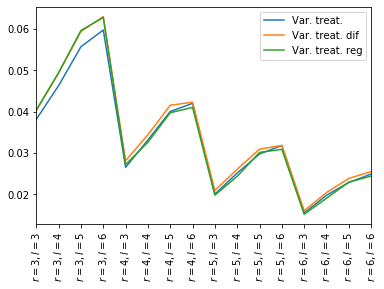

In [66]:
PlotTreatmentVariance(df_test, var = 'perc_dificil_elo_p%s_c%s', dific = 'dificil', defin = 'elo')

In [69]:
def PlotEloVariance(df_efecto, df_elo):
    Torneos = df_efecto['Torneo'].drop_duplicates().tolist()
    elotorneo = {}
    for torneo in Torneos:
        eqtorneo = df_efecto[df_efecto['Torneo'] == torneo]['equipo'].tolist()
        df_aux = df_elo[(df_elo['Torneo'] == torneo) & (df_elo['Club'].isin(eqtorneo))].sort_values(by = 'Elo', ascending = False)
        elotorneo[torneo] = df_aux['Club'].tolist()
#         elotorneo[torneo] = df_aux['Elo'].tolist()
#         print(elotorneo[torneo])
    var_facil = []
    var_dificil = []
#     for l in [3,4,5,6]:
    for l in range(3,11):
        elofacil = []
        elodificil = []
        for torneo in Torneos:
            elofacil = elofacil + df_efecto[df_efecto['equipo'].isin(elotorneo[torneo][-l:])]['position_final'].tolist()
            elodificil = elodificil + df_efecto[df_efecto['equipo'].isin(elotorneo[torneo][:l])]['position_final'].tolist()
#             elofacil = elofacil + elotorneo[torneo][-l:]
#             elodificil = elodificil + elotorneo[torneo][:l]
        var_facil.append(np.var(elofacil))
        var_dificil.append(np.var(elodificil))
    df_plot = pd.DataFrame(data = {'Var. Pos. Fácil' : var_facil, 'Var. Pos. difícil' : var_dificil}, index = [i for i in range(3,11)])
    df_plot.plot()
    plt.title('Varianza de posiciones según distintos puntos de corte de tabla ELO')
    plt.xlabel('$l$')
    plt.show()

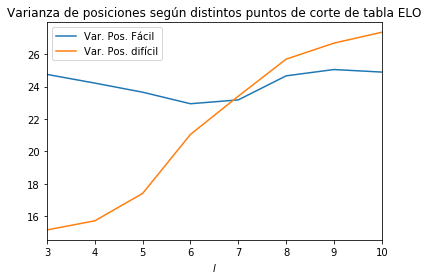

In [70]:
elodir = os.path.join(os.path.pardir,'datos','elo')
df_elo = pd.read_excel(os.path.join(elodir, 'Inglaterra.xlsx'))
PlotEloVariance(df_test, df_elo)

In [46]:
def TablasVarianzaTratamientos(df_liga, variab, defin, filtro):
    tabla_proms = []
    r_column = []
    c_column = []
    for r in [3,4,5,6]: 
        for c in [3,4,5,6]:
            var = variab % (r,c)
            if filtro == 'dificultad':
                if 'facil' in var:
                    filt = 'facil'
                else:
                    filt = 'dificil'
            else:
                filt = filtro
            df_pretrat_filt = FiltrarRegulares(df_liga, defin, c, None, filt)[[var, 'equipo']]
            df_pretrat_filt = df_pretrat_filt.round(decimals=3)
            df_gbcount = df_pretrat_filt.groupby(var).agg({'equipo' : 'count'}).reset_index()
            df_gbcount.columns = ['Frac. partidos','Percentage']
            df_gbcount['Percentage'] = df_gbcount['Percentage']/df_pretrat_filt.shape[0]
            tabla_proms.append(df_gbcount)
            r_column = r_column + [r]*df_gbcount.shape[0]
            c_column = c_column + [c]*df_gbcount.shape[0]
    df_plots = pd.concat(tabla_proms, ignore_index = True)
    df_plots['r'] = r_column
    df_plots['l'] = c_column
    for r in [3,4,5,6]:
        df_plot = df_plots[df_plots['r'] == r].reset_index(drop=True)[['Frac. partidos','Percentage','l']]
        df_plot.pivot(index='l', columns='Frac. partidos', values='Percentage').plot(kind='bar', figsize=(10,5))
        plt.title('Varianza tratamiento para primeros %s partidos' % r)
        plt.ylabel('Porcentaje')
        plt.show()
#     return df_plot

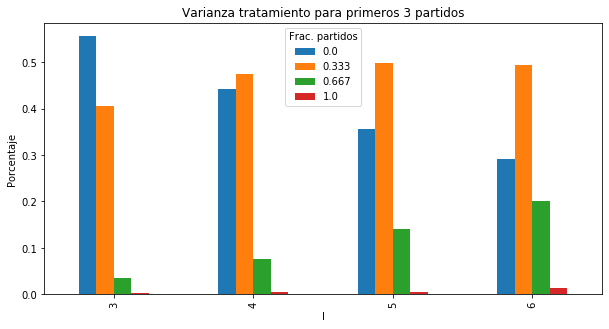

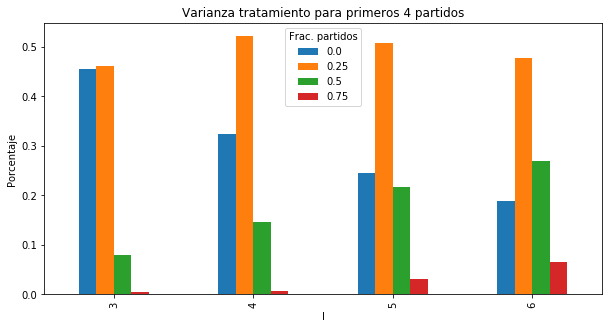

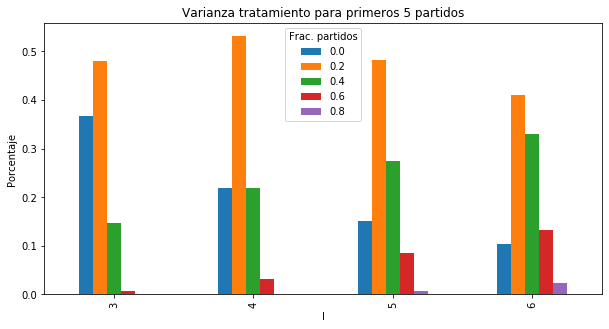

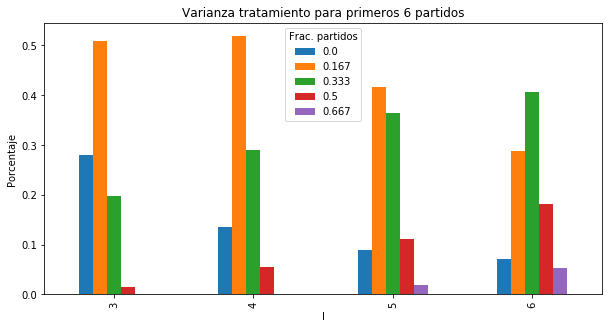

In [49]:
TablasVarianzaTratamientos(df_test, "perc_facil_elo_p%s_c%s",'elo', 'dificultad')